In [ ]:
import pandas as pd
import glob
import talib
import matplotlib.pyplot as plt


file_path = r"C:/Users/pc/Desktop/10 Academy/Week 1/yfinance_data/*.csv"

# Get list of CSV files
csv_files = glob.glob(file_path)

# Load and concatenate all CSVs into one DataFrame
df_list = []
for file in csv_files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

# Combine all data
df = pd.concat(df_list, ignore_index=True)

# sort by date  a date column
df['Date'] = pd.to_datetime(df['Date'])  
df = df.sort_values('Date').reset_index(drop=True)

print(df.head())


        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [7]:

#  'Close' column 
close = df['Close']
# Make sure the 'Close' column is present and numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# 1. Simple Moving Average (SMA)
df['SMA_20'] = talib.SMA(close, timeperiod=20)

# 2. Exponential Moving Average (EMA)
df['EMA_20'] = talib.EMA(close, timeperiod=20)

# 3. Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(close, timeperiod=14)

# 4. MACD (Moving Average Convergence Divergence)

macd, macd_signal, macd_hist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

df['MACD'] = macd
df['MACD_signal'] = macd_signal
df['MACD_hist'] = macd_hist


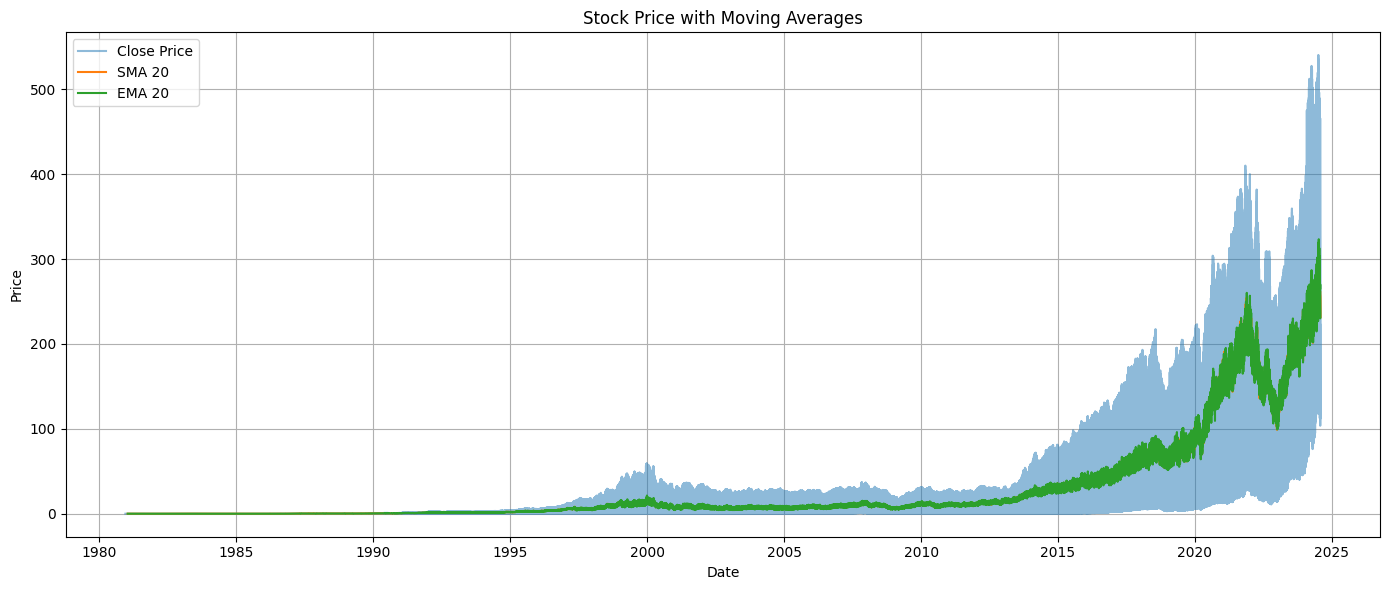

In [8]:

# Plot Close + SMA + EMA
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['EMA_20'], label='EMA 20')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


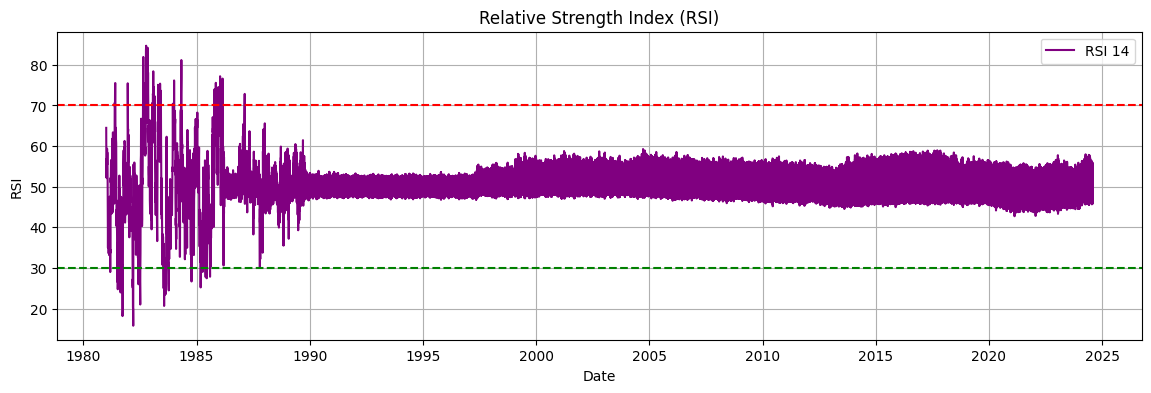

In [9]:


# Plot RSI separately
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, linestyle='--', color='red')  # Overbought threshold
plt.axhline(30, linestyle='--', color='green')  # Oversold threshold
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()



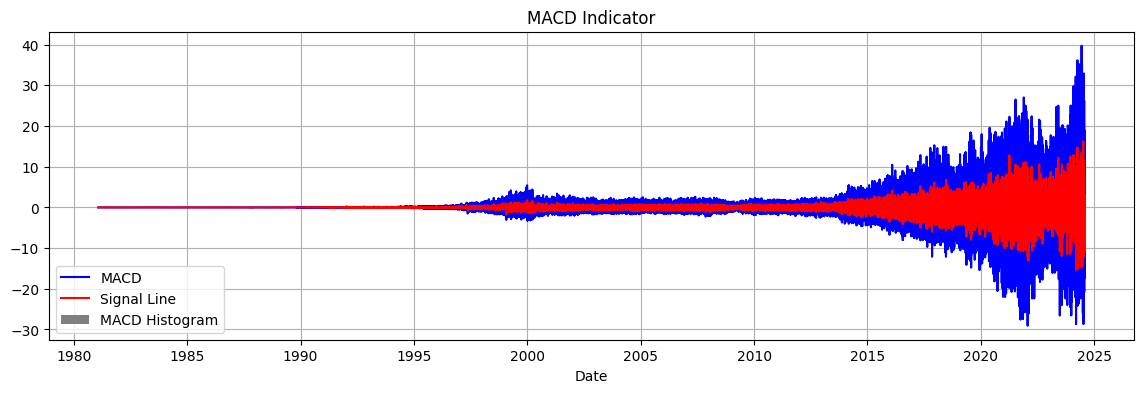

In [10]:

# Plot MACD
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['MACD_signal'], label='Signal Line', color='red')
plt.bar(df['Date'], df['MACD_hist'], label='MACD Histogram', color='gray')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()
